<a href="https://colab.research.google.com/github/GGeonHee/Data_Mining/blob/main/DMProject_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1nB9dsG-u4PqLVBhi9ShxkMI4gVsw5R9w")
df.info()

#범주형 - Gender, CALC, FAVC, SCC, SMOKE, family_history_with_overweight, CAEC, MTRANS,NObeyesdad -> OrdinalEncoding, OneHotEncoding(get_dummies)로 스케일링
#수치형 - Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE -> 정규화 수행
#*** 수치형변수는 정규화(StandardScaler),범주형 변수는 더미화(One-Hot Encoding) 적용해 결합하는게 좋음***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

# 전처리

In [ ]:
calc_unique = df['CALC'].unique()
print("CALC unique values:", calc_unique)

# 'CAEC' 열의 고유 값
caec_unique = df['CAEC'].unique()
print("CAEC unique values:", caec_unique)
#데이터간의 순위가 존재하는 순서형 데이터는 Ordinal Encoding 사용 -> CALC(알콜섭취)와 CAEC(식사간의 간식섭취)는 둘다 Sometimes, Frequently, Always, no이므로 Always-3, Frequently-2, Sometimes-1, no-0으로 더미화
#또 NObeyesdad(체중 상태 수준)의 항목을 보면 ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']로 나타나는데, 구글링하니 순서형변수로 볼 수 있음
#Class 1 (low-risk) obesity, if BMI is 30.0 to 34.9. Class 2 (moderate-risk) obesity, if BMI is 35.0 to 39.9. Class 3 (high-risk) obesity, if BMI is equal to or greater than 40.0 (출처:https://medlineplus.gov/ency/patientinstructions/000348.htm)

CALC unique values: ['no' 'Sometimes' 'Frequently' 'Always']
CAEC unique values: ['Sometimes' 'Frequently' 'Always' 'no']


In [ ]:
# 순서형데이터 Ordinal Encoder사용
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv("https://drive.google.com/uc?id=1nB9dsG-u4PqLVBhi9ShxkMI4gVsw5R9w")

CALC_order = ['no' , 'Sometimes' , 'Frequently' , 'Always']
CAEC_order = ['no' , 'Sometimes' , 'Frequently' , 'Always']
NObeyesdad_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# OrdinalEncoder 객체 생성
encoder = OrdinalEncoder(categories=[CALC_order, CAEC_order, NObeyesdad_order])

# 'CALC'와 'CAEC', ' NObeyesdad_order' 열만 선택하여 인코딩
encoded_columns = encoder.fit_transform(df[['CALC', 'CAEC', 'NObeyesdad']])

# 변환된 결과를 데이터프레임으로 변환
encoded_df = pd.DataFrame(encoded_columns, columns=['CALC', 'CAEC', 'NObeyesdad'])

# 원래 데이터프레임의 'CALC'와 'CAEC' 열을 인코딩된 값으로 대체
df[['CALC', 'CAEC', 'NObeyesdad']] = encoded_df
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,0.0,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,1.0,Public_Transportation,1.0
1,21.0,Female,1.52,56.0,1.0,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,1.0,Public_Transportation,1.0
2,23.0,Male,1.80,77.0,2.0,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,1.0,Public_Transportation,1.0
3,27.0,Male,1.80,87.0,2.0,no,3.0,3.0,no,no,2.0,no,2.0,0.0,1.0,Walking,2.0
4,22.0,Male,1.78,89.8,1.0,no,2.0,1.0,no,no,2.0,no,0.0,0.0,1.0,Public_Transportation,3.0


In [ ]:
# 순서 없는 범주형변수들을 지정해서 원핫인코딩 수행
columns_to_dummy = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'MTRANS']
df = pd.get_dummies(df, columns=columns_to_dummy, drop_first=True, dtype=int)
df.head()

,Age,Height,Weight,CALC,FCVC,NCP,CH2O,FAF,TUE,CAEC,NObeyesdad,Gender_Male,FAVC_yes,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,1.0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,1.0,3.0,3.0,3.0,3.0,0.0,1.0,1.0,0,0,1,1,1,0,0,1,0
2,23.0,1.80,77.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1,0,0,0,1,0,0,1,0
3,27.0,1.80,87.0,2.0,3.0,3.0,2.0,2.0,0.0,1.0,2.0,1,0,0,0,0,0,0,0,1
4,22.0,1.78,89.8,1.0,2.0,1.0,2.0,0.0,0.0,1.0,3.0,1,0,0,0,0,0,0,1,0


In [ ]:
#정규화
#데이터의 범위를 조정하여 모델 학습을 돕는 과정. 특성의 값 범위가 크게 다른 경우, 거리 기반 알고리즘 사용 시, 경사 하강법 기반 알고리즘 (선형회귀, 로지스틱회귀, 인공신경망 등) 사용 시에 사용하면 더 나은 성능 얻을 수 있음
#전체 데이터셋을 정규화할 때, 더미화된 변수를 포함하여 정규화할 수 있습니다. 이는 일관된 스케일을 유지하는 데 도움이 됩니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 연속형 및 정수형 변수 지정
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# ColumnTransformer를 사용하여 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_columns)])

# 파이프라인을 통해 데이터 변환
df_processed = preprocessor.fit_transform(df)

# 결과를 데이터프레임으로 변환
df_numerical_scaled = pd.DataFrame(df_processed, columns=numerical_columns)

# 정규화된 연속형 및 정수형 변수와 원래 데이터프레임의 범주형 변수를 결합
df_final = pd.concat([df_numerical_scaled, df.drop(columns=numerical_columns)], axis=1)

df_final

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,CAEC,NObeyesdad,Gender_Male,FAVC_yes,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,1.0,1.0,0,0,0,0,1,0,0,1,0
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,1.0,1.0,1.0,0,0,1,1,1,0,0,1,0
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,2.0,1.0,1.0,1,0,0,0,1,0,0,1,0
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,2.0,1.0,2.0,1,0,0,0,0,0,0,0,1
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,1.0,3.0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,1.0,1.0,6.0,0,1,0,0,1,0,0,1,0
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,1.0,1.0,6.0,0,1,0,0,1,0,0,1,0
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,1.0,1.0,6.0,0,1,0,0,1,0,0,1,0
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,1.0,1.0,6.0,0,1,0,0,1,0,0,1,0


In [ ]:
df = df_final.copy()

In [ ]:
#train, test 분리

In [ ]:
from sklearn.model_selection import train_test_split

# 독립 변수와 종속 변수 정의
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("훈련 세트의 크기:", X_train.shape[0])
print("테스트 세트의 크기:", X_test.shape[0])

훈련 세트의 크기: 1688
테스트 세트의 크기: 423


In [ ]:
#모델
#상관관계분석

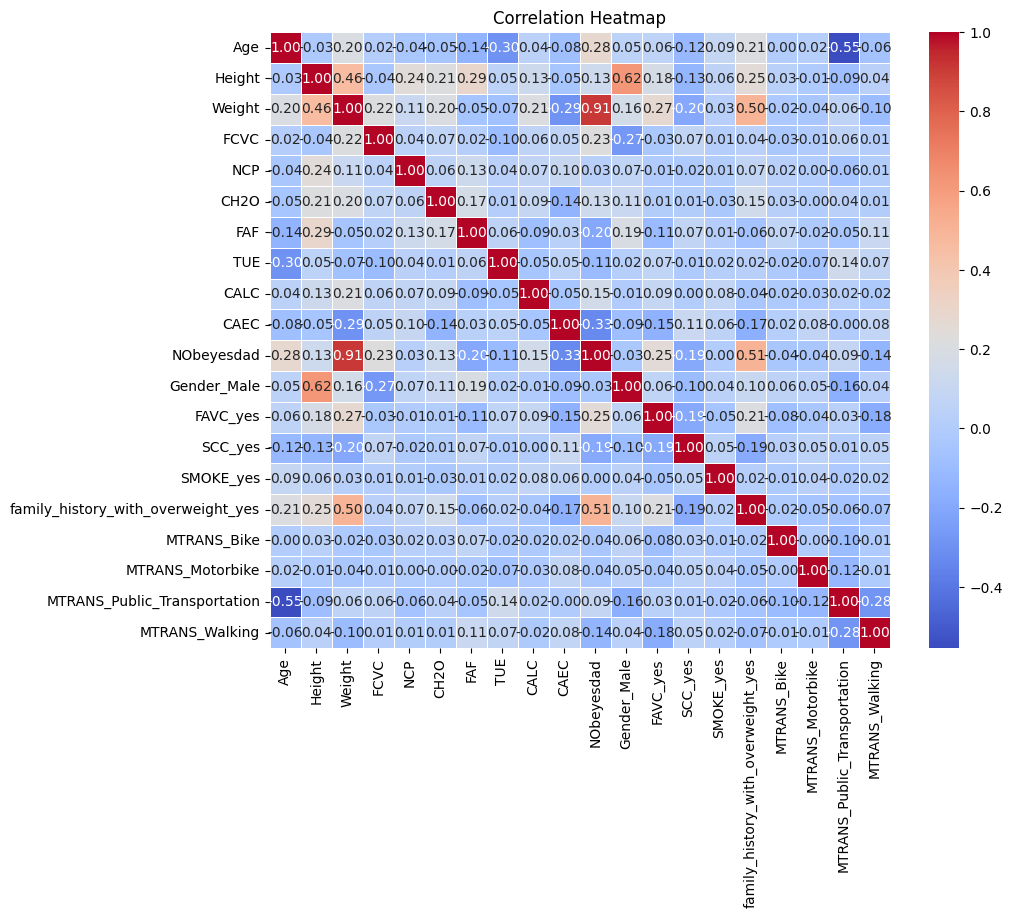

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 'NObeyesdad' 변수를 기준으로 다른 변수들의 상관관계를 정렬
correlation_with_NOeyesdad = correlation_matrix['NObeyesdad'].sort_values(ascending=False)
correlation_with_NOeyesdad

NObeyesdad                            1.000000
Weight                                0.913251
family_history_with_overweight_yes    0.505148
Age                                   0.282913
FAVC_yes                              0.247793
FCVC                                  0.227759
CALC                                  0.151752
Height                                0.133565
CH2O                                  0.133008
MTRANS_Public_Transportation          0.085606
NCP                                   0.026690
SMOKE_yes                             0.003442
Gender_Male                          -0.031464
MTRANS_Bike                          -0.036479
MTRANS_Motorbike                     -0.037247
TUE                                  -0.107991
MTRANS_Walking                       -0.138564
SCC_yes                              -0.194508
FAF                                  -0.199901
CAEC                                 -0.329350
Name: NObeyesdad, dtype: float64

In [ ]:
# 'NObeyesdad' 변수를 기준으로 다른 변수들의 상관관계를 정렬 (절댓값으로 계산)
correlation_with_NOeyesdad = correlation_matrix['NObeyesdad'].abs().sort_values(ascending=False)
correlation_with_NOeyesdad

#- 모든 변수와 NObeysdad 간의 상관관계
#높은 상관 관계 :Weight(0.9133), family_history_with_overweight_yes(0.5051)
#낮은 상관 관계: SMOKE_yes(흡연여부), NCP(식사빈도), Gender_MALE(성별), MTRANS(이동수단)

NObeyesdad                            1.000000
Weight                                0.913251
family_history_with_overweight_yes    0.505148
CAEC                                  0.329350
Age                                   0.282913
FAVC_yes                              0.247793
FCVC                                  0.227759
FAF                                   0.199901
SCC_yes                               0.194508
CALC                                  0.151752
MTRANS_Walking                        0.138564
Height                                0.133565
CH2O                                  0.133008
TUE                                   0.107991
MTRANS_Public_Transportation          0.085606
MTRANS_Motorbike                      0.037247
MTRANS_Bike                           0.036479
Gender_Male                           0.031464
NCP                                   0.026690
SMOKE_yes                             0.003442
Name: NObeyesdad, dtype: float64

In [ ]:
# 다중공선성 확인 - VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공산성 계산
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# 결과 출력
print(vif_data)

# 다중공산성 문제가 있을 가능성이 높은 변수 (10이상인 변수)
# Weight(10.8296) (+: FAVC_yes(9.1577), family_history_with_overweight_yes(8.2314) )

#VIF큰 변수들은 PCA, 릿지/라쏘 회귀

                               feature        VIF
0                                  Age   2.117338
1                               Height   4.390015
2                               Weight  10.829585
3                                 FCVC   1.228387
4                                  NCP   1.110413
5                                 CH2O   1.124699
6                                  FAF   1.225260
7                                  TUE   1.143515
8                                 CALC   3.154845
9                                 CAEC   6.920269
10                          NObeyesdad  33.541618
11                         Gender_Male   3.767560
12                            FAVC_yes   9.157739
13                             SCC_yes   1.149034
14                           SMOKE_yes   1.063695
15  family_history_with_overweight_yes   8.231424
16                         MTRANS_Bike   1.032348
17                    MTRANS_Motorbike   1.052971
18        MTRANS_Public_Transportation   7.756992


#회귀

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델을 훈련 세트에 맞춤
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 선형 회귀 모델 선택 및 학습
from sklearn.linear_model import LinearRegression

# 모델 초기화
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트에서 예측 수행
y_pred = model.predict(X_test)


# 회귀 모델이므로 정확도 대신 다른 지표를 사용해야 함
# 여기서는 평균 제곱 오차(MSE)를 사용하여 모델의 성능을 평가합니다.

# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.1780482935107612
R-squared (R2): 0.9552260577774837


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 준비
#
# X와 y를 설정합니다.
X = df.drop('NObeyesdad', axis=1)  # 독립 변수
y = df['NObeyesdad']  # 종속 변수

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 회귀 모델 선택 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# 5. 결과 해석
# 회귀 계수(coefficient)와 절편(intercept)를 확인하여 각 변수의 영향력을 해석합니다.
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

#더미화 진행하기 전보다 훨씬 높아진 것을 알 수 있음

Mean Squared Error (MSE): 0.1780482935107612
R-squared (R2): 0.9552260577774837
회귀 계수: [ 1.30272854e-01 -6.93307848e-01  2.01776756e+00  5.44301027e-04
  2.34635989e-02 -9.29300532e-03 -6.85586755e-02  1.20607938e-03
 -7.10957364e-02 -1.49320231e-01  6.02798094e-02  4.81052925e-02
 -9.17251783e-02 -4.27811755e-02  3.15454620e-01 -1.43590688e-01
  1.45600928e-01  1.74475609e-01  6.68479710e-02]
절편: 2.8790921114242503


In [ ]:
#OLS 진행 (1.부분회귀 2. stepwise)
#OLS(Ordinary Least Squares) 분석은 회귀 분석에서 가장 일반적으로 사용되는 방법 중 하나로 종속 변수와 독립 변수 간의 선형 관계를 모델링하는 데 사용.

In [ ]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# 상수항 추가
X = sm.add_constant(X)

# OLS 모델 피팅
model = sm.OLS(y, X).fit()

# p-value 출력
print(model.summary())

#p-value는 FCVC, CH2O, TUE, FAVC_yes, SCC_yes, SMOKE_yes, MTRANS_(Bike, Motorbike, Walking)를 제외하고 다 유의함

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2148.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:49:40   Log-Likelihood:                -1253.2
No. Observations:                2111   AIC:                             2546.
Df Residuals:                    2091   BIC:                             2660.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [ ]:
#-> Age, Height, Weight, Gender, NCP, FAF, CALC, CAEC, Gender_Male, family_history_with_overweight_yes, MTRANS_Public_Transportation 변수들은 Nobeyesdad에 유의한 변수들 -> 부분회귀 돌리기

# 1. OLS활용한 부분회귀분석

In [ ]:
import statsmodels.api as sm

# 유의한 변수들로 이루어진 새로운 데이터프레임 구성
significant_features = ['Age', 'Height', 'Weight', 'NCP', 'FAF', 'CALC',
                        'CAEC', 'Gender_Male', 'family_history_with_overweight_yes',
                        'MTRANS_Public_Transportation']
X_partial = df[significant_features]

# 종속 변수 선택
y = df['NObeyesdad']  # 종속 변수 예시로 사용

# 상수항 추가
X_partial = sm.add_constant(X_partial)

# 부분 회귀 분석 수행
model_partial = sm.OLS(y, X_partial).fit()

# 결과 출력
print(model_partial.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     4081.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:51:32   Log-Likelihood:                -1257.7
No. Observations:                2111   AIC:                             2537.
Df Residuals:                    2100   BIC:                             2600.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [ ]:
# 다 유의, R, Rsquare:0.951

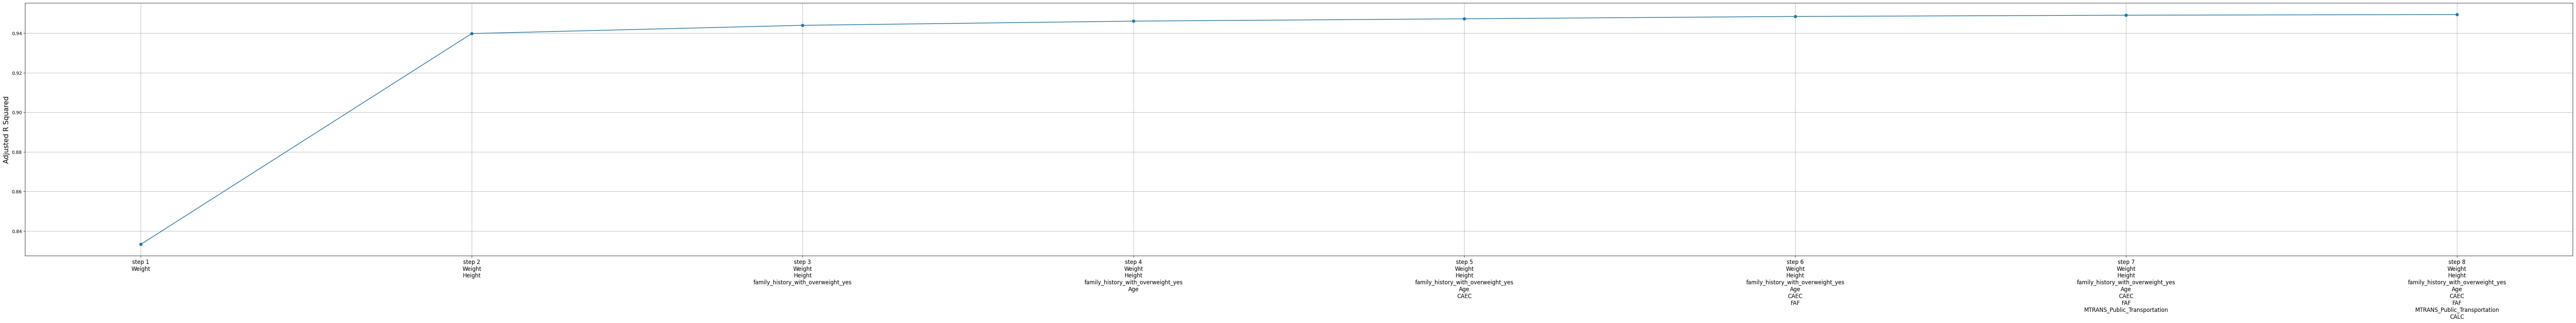

In [ ]:
# 2. OLS 활용한 stepwise 변수선택법

def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")

    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder:
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables


selected_variables = stepwise_feature_selection(X_train, y_train)

In [ ]:
# 최종 선택된 변수 : 'Weight', 'Height', 'family_history_with_overweight_yes', 'Age', 'CAEC', 'FAF', 'MTRANS_Public_Transportation', 'CALC'

In [ ]:
# stepwise로 선택된 변수들로 부분회귀분석

model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0)
print(model.summary())

#변수선택법으로 회귀분석돌려도 다 유의, R, Rsquare:0.95

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     3958.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:51:43   Log-Likelihood:                -1027.6
No. Observations:                1688   AIC:                             2073.
Df Residuals:                    1679   BIC:                             2122.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 선택된 변수들만 포함한 데이터프레임 생성
selected_columns = ['Weight', 'Height', 'family_history_with_overweight_yes',
                    'Age', 'CAEC', 'FAF', 'MTRANS_Public_Transportation', 'CALC']
X_selected = df[selected_columns]
y = df['NObeyesdad']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측값과 실제값 계산
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.1799648826908448
Root Mean Squared Error (RMSE): 0.42422268054742757
R-squared (R2): 0.9547440916124547


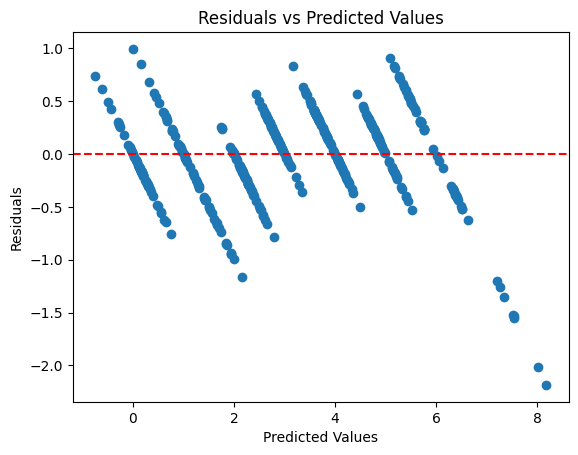

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

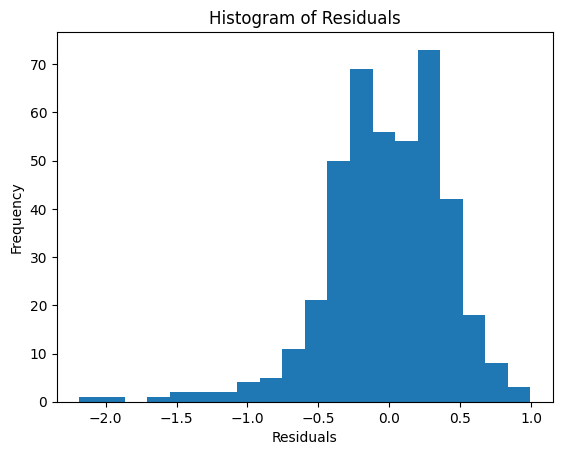

In [ ]:
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

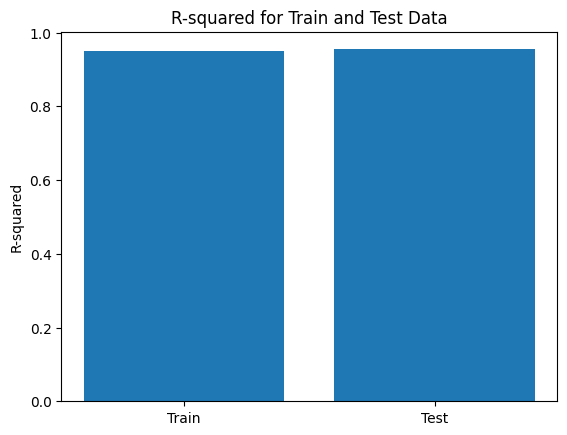

In [ ]:
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

plt.bar(['Train', 'Test'], [train_r2, test_r2])
plt.ylabel("R-squared")
plt.title("R-squared for Train and Test Data")
plt.show()

# PCA & 계층적 클러스터

In [ ]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

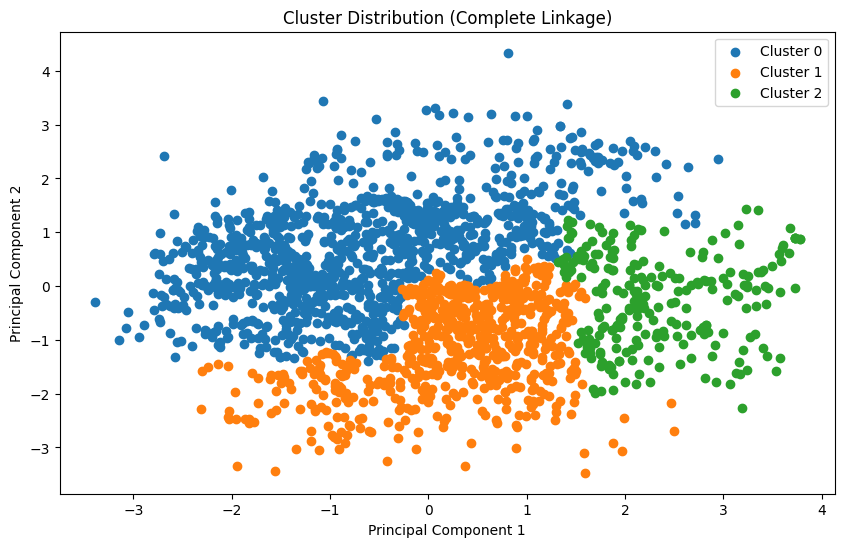

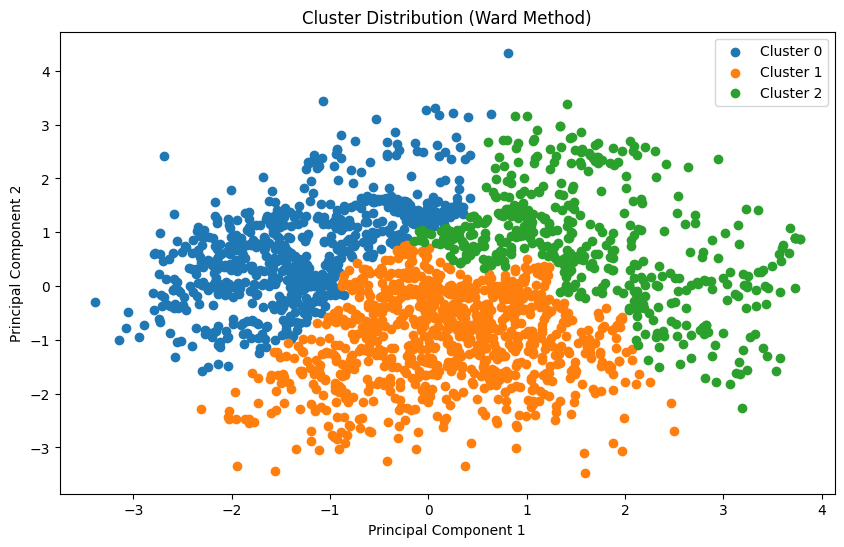

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 계층적 클러스터링 모델을 설정 (완전연결법)
model_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
cluster_labels_complete = model_complete.fit_predict(X_pca)

# 계층적 클러스터링 모델을 설정 (와드방법)
model_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels_ward = model_ward.fit_predict(X_pca)

# 완전연결법으로 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
for i in range(3):  # n_clusters 값을 3으로 설정
    plt.scatter(X_pca[cluster_labels_complete == i, 0], X_pca[cluster_labels_complete == i, 1], label=f'Cluster {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Distribution (Complete Linkage)')
plt.legend()
plt.show()

# 와드방법으로 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
for i in range(3):  # n_clusters 값을 3으로 설정
    plt.scatter(X_pca[cluster_labels_ward == i, 0], X_pca[cluster_labels_ward == i, 1], label=f'Cluster {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Distribution (Ward Method)')
plt.legend()
plt.show()

Method: complete, Calinski-Harabasz Score: 1419.3586939212903
Method: ward, Calinski-Harabasz Score: 1337.5664388795851
Method: average, Calinski-Harabasz Score: 773.1868981217589
Method: single, Calinski-Harabasz Score: 4.670712831306349


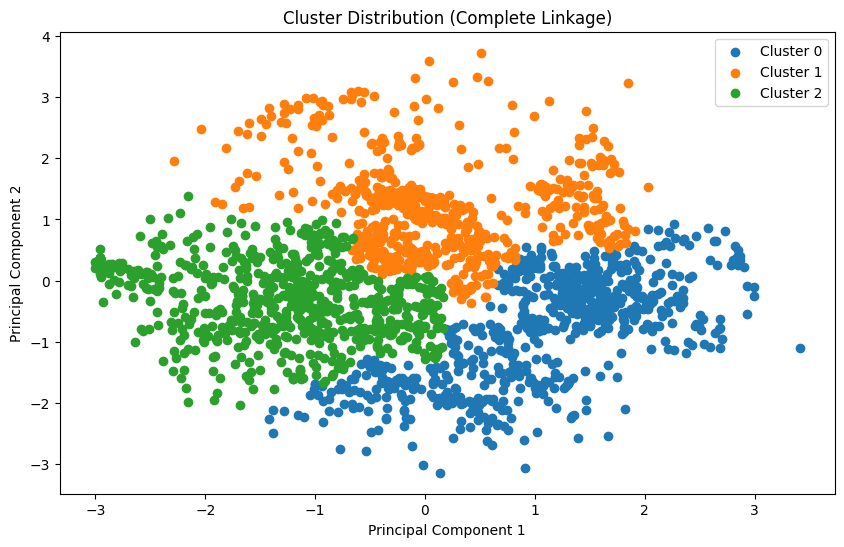

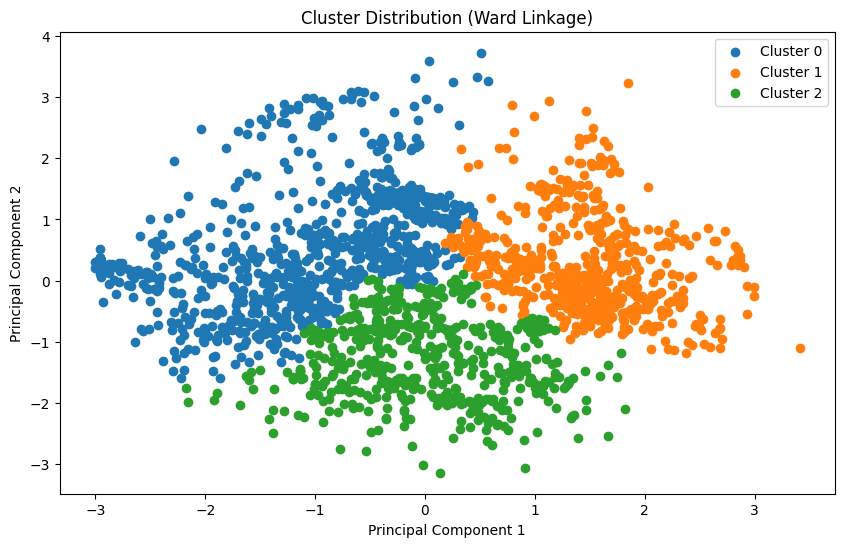

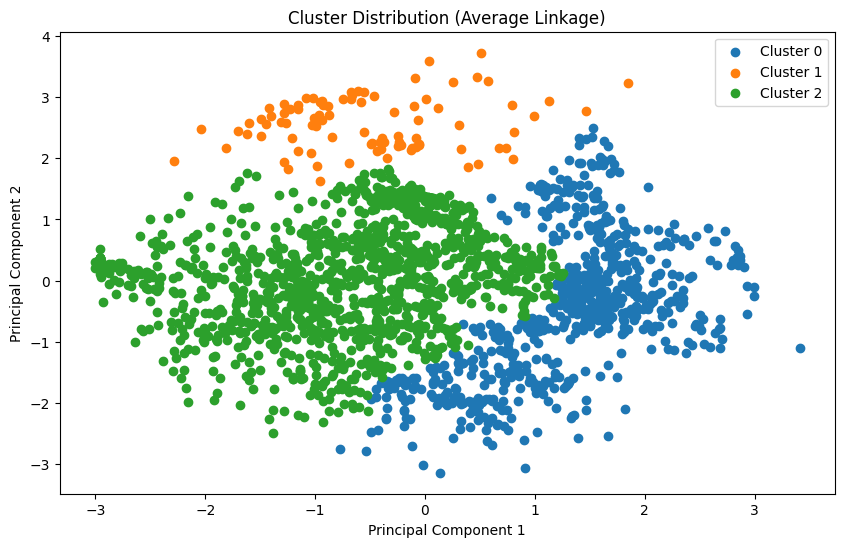

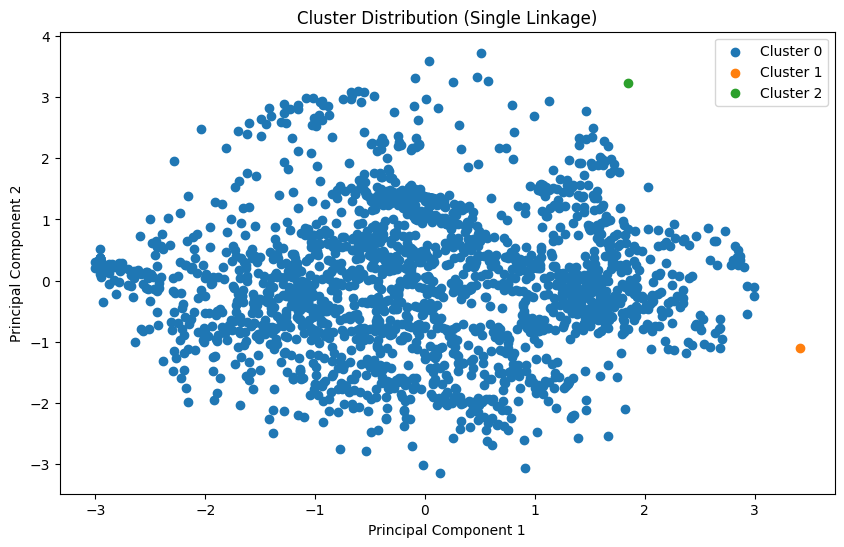

Best clustering method: complete, with Calinski-Harabasz Score: 1419.3586939212903


In [ ]:
# AgglomerativeClustering의 linkage 매개변수로 'centroid'가 지원되지 않는다는 오류 메시지를 받았습니다
# 따라서, 'centroid' 방법을 제외하고, 나머지 네 가지 방법(complete, average, ward, single)으로 클러스터링을 수행하고 결과를 비교


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# 계층적 클러스터링 방법 리스트
linkage_methods = ['complete', 'ward', 'average', 'single']
cluster_labels = {}
scores = {}

# 각 클러스터링 방법에 대해 클러스터링 수행 및 점수 계산
for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(X_pca)
    cluster_labels[method] = labels
    score = calinski_harabasz_score(X_pca, labels)
    scores[method] = score
    print(f"Method: {method}, Calinski-Harabasz Score: {score}")

# 클러스터링 결과 시각화
for method in linkage_methods:
    plt.figure(figsize=(10, 6))
    for i in range(3):  # n_clusters 값을 3으로 설정
        plt.scatter(X_pca[cluster_labels[method] == i, 0], X_pca[cluster_labels[method] == i, 1], label=f'Cluster {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Cluster Distribution ({method.capitalize()} Linkage)')
    plt.legend()
    plt.show()

# 최적의 클러스터링 방법 출력
best_method = max(scores, key=scores.get)
print(f"Best clustering method: {best_method}, with Calinski-Harabasz Score: {scores[best_method]}")

결과적으로, PCA를 사용해 데이터를 2차원으로 축소하고 계층적 클러스터링 모델(Agglomerative Clustering)을 complete, ward, average, single 네가지 방법으로 수행한 결과, 가장 좋은 클러스터링은 완전연결법(complete method)를 활용한 모델이었음. (성능평가=calinski_harabasz_score)

덴드로그램을 그리면 다음과 같음

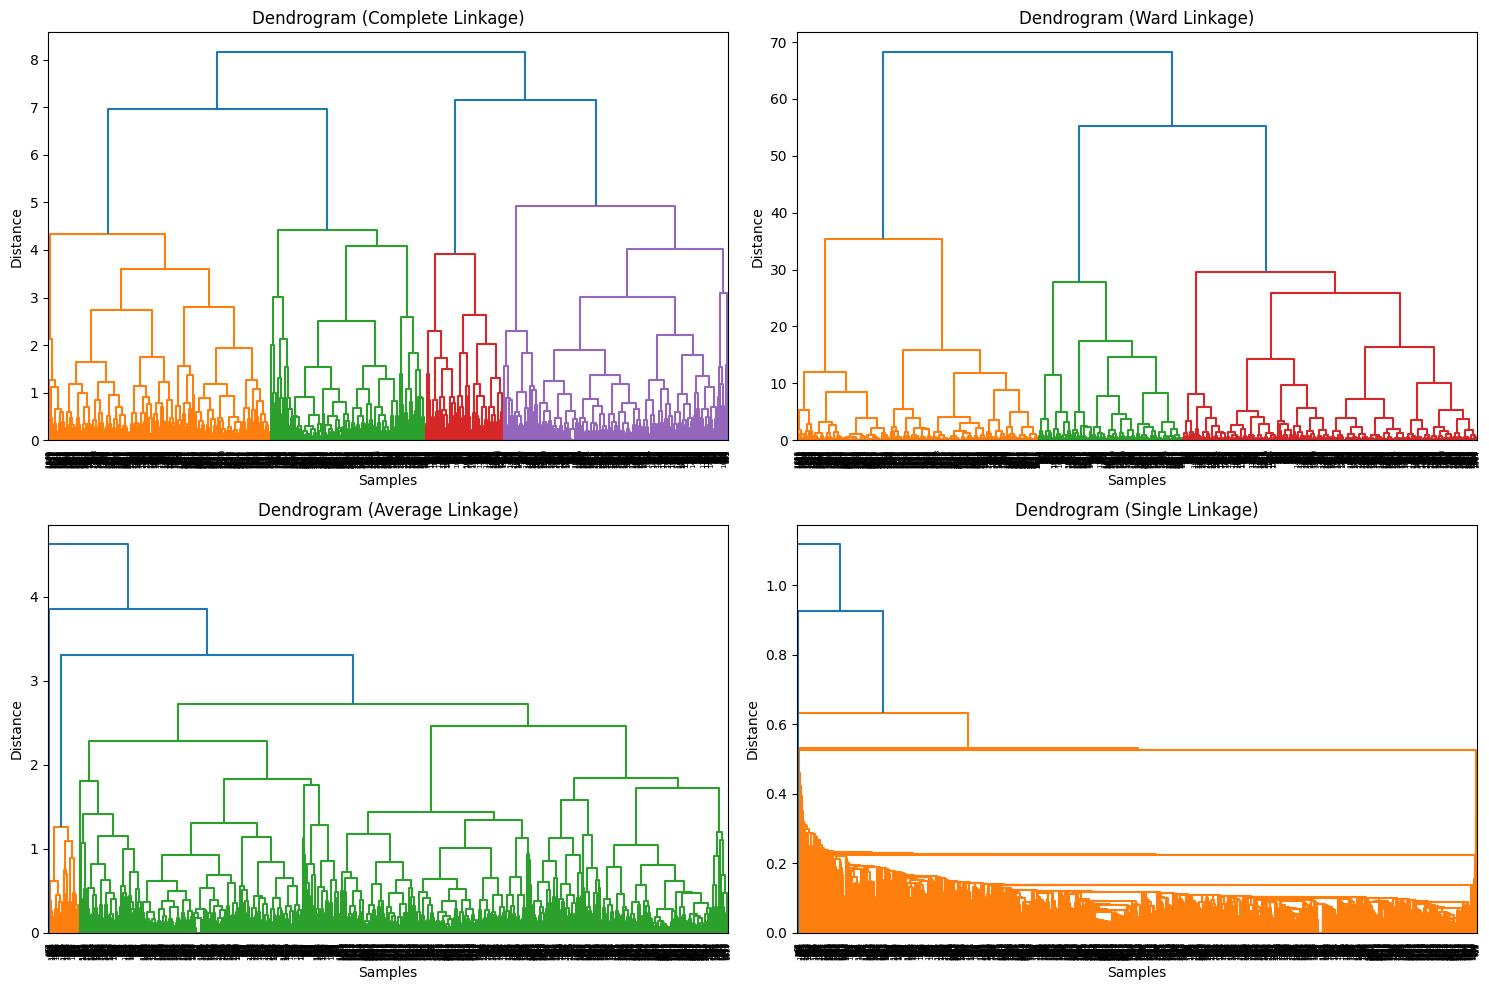

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 계층적 클러스터링 방법 리스트
linkage_methods = ['complete', 'ward', 'average', 'single']

# 각 클러스터링 방법에 대해 덴드로그램 그리기
plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    Z = linkage(X_pca, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

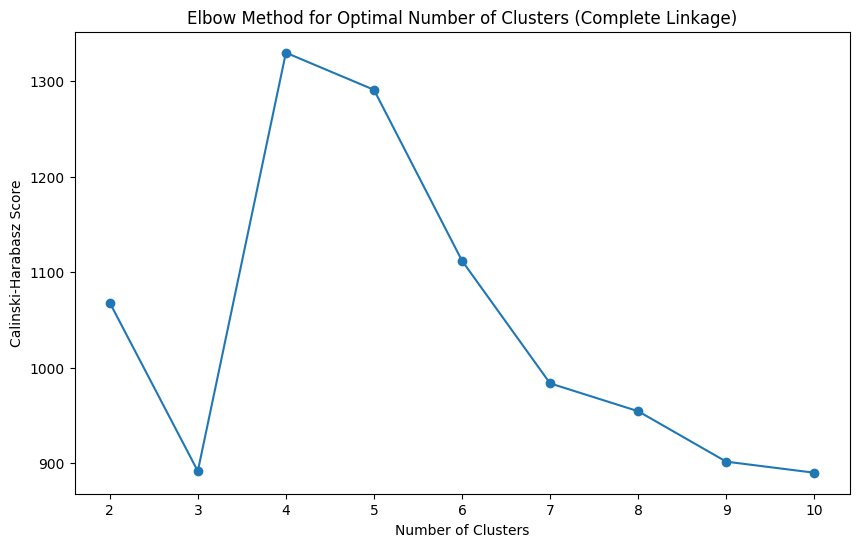

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

# 다양한 클러스터 수에 대해 칼린스키-하라바즈 점수 계산
calinski_harabasz_scores = []
cluster_range = range(2, 11)  # 2에서 10까지의 클러스터 수를 테스트
for n_clusters in cluster_range:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    labels = model.fit_predict(X_pca)
    score = calinski_harabasz_score(X_pca, labels)
    calinski_harabasz_scores.append(score)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, calinski_harabasz_scores, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (Complete Linkage)')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

위 그래프가 증가,감소를 계속해서 그래프해석에 용이하지 않으므로 칼린스키 최대 점수(8클러스터) 최소점수(5)를 비교할 것. (일반적으로 최대점수가 높은 경우가 좋은 군집화 품질을 나타내지만, 실제 데이터분포를 시각적으로 평가하는 것도 중요)

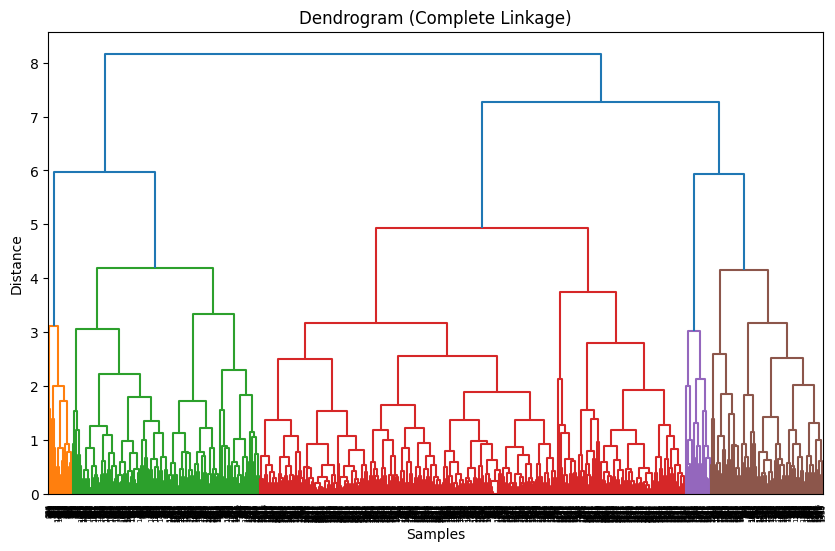

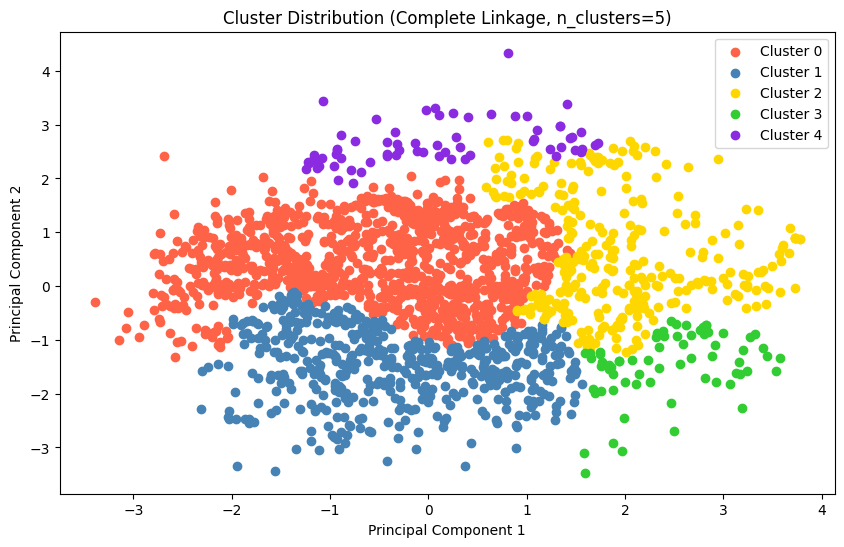

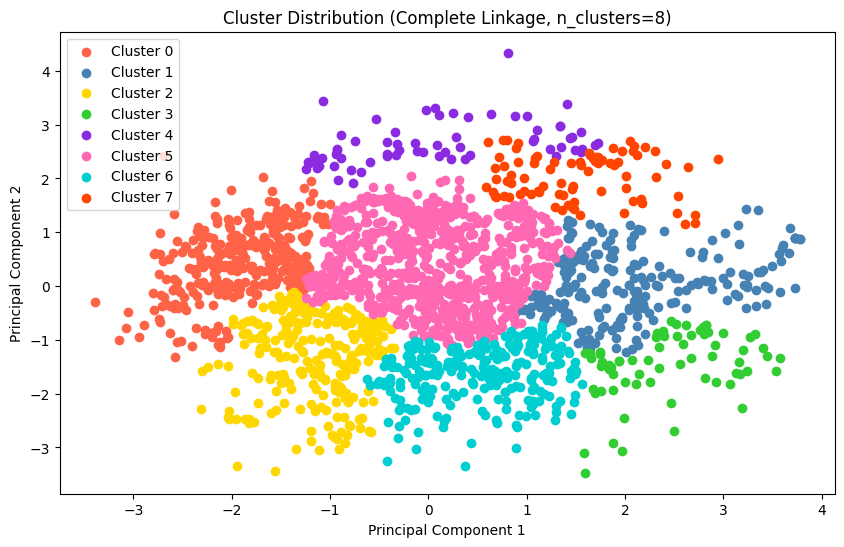

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Complete linkage를 사용한 계층 군집 분석
Z_complete = linkage(X_pca, method='complete')

# 덴드로그램 그리기
plt.figure(figsize=(10, 6))
dendrogram(Z_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# 최적의 클러스터 수 후보들
optimal_clusters = [5, 8]

# 색상표 설정 (8개의 서로 다른 색상)
colors = ['#FF6347', '#4682B4', '#FFD700', '#32CD32', '#8A2BE2', '#FF69B4', '#00CED1', '#FF4500']

# 각 클러스터 수에 대해 군집화 결과 시각화
for n_clusters in optimal_clusters:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    labels = model.fit_predict(X_pca)
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}', color=colors[i])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Cluster Distribution (Complete Linkage, n_clusters={n_clusters})')
    plt.legend()
    plt.show()

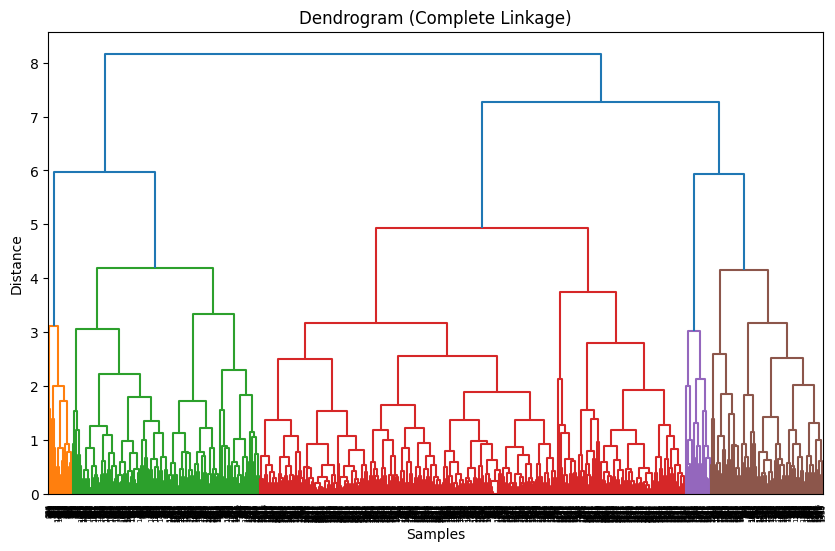

n_clusters: 3, Calinski-Harabasz Score: 773.9743374418869


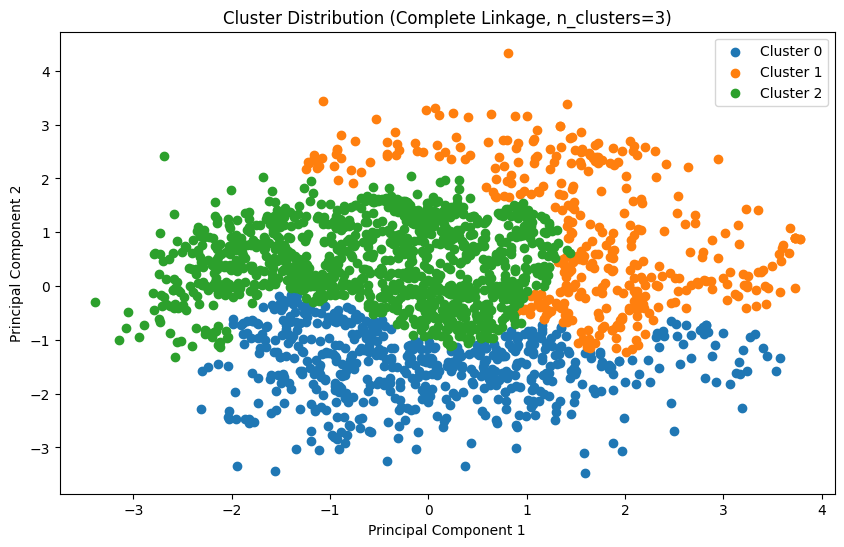

n_clusters: 5, Calinski-Harabasz Score: 633.5180648824289


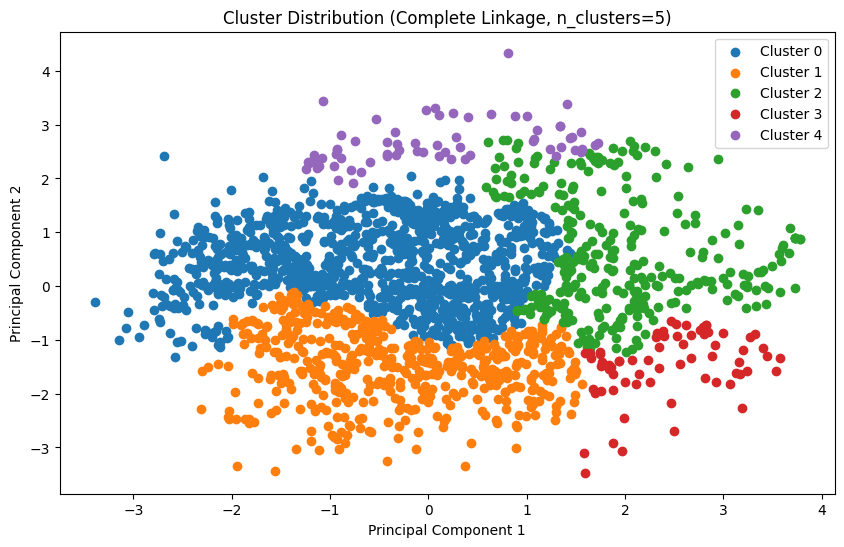

n_clusters: 8, Calinski-Harabasz Score: 962.8835772747848


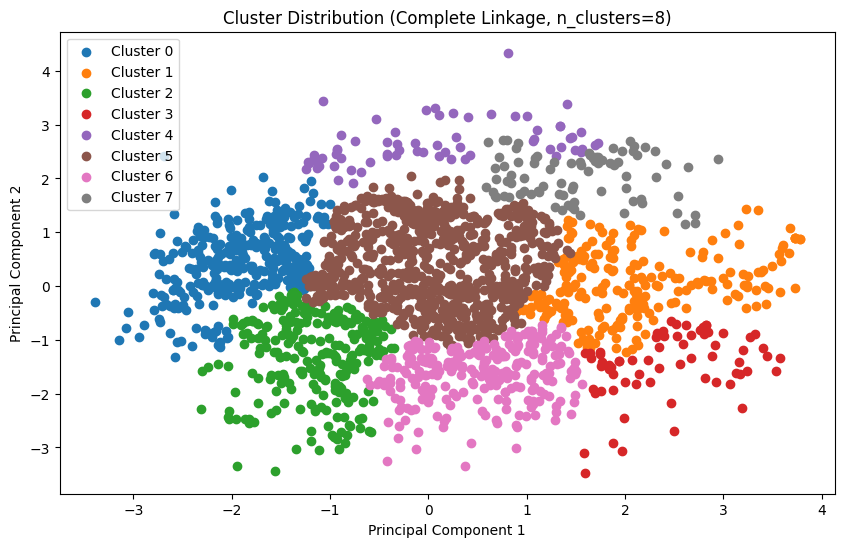


Detailed Calinski-Harabasz Scores:
Number of clusters: 3, Calinski-Harabasz Score: 773.97
Number of clusters: 5, Calinski-Harabasz Score: 633.52
Number of clusters: 8, Calinski-Harabasz Score: 962.88


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Complete linkage를 사용한 계층 군집 분석
Z_complete = linkage(X_pca, method='complete')

# 덴드로그램 그리기
plt.figure(figsize=(10, 6))
dendrogram(Z_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# 최적의 클러스터 수 후보들
optimal_clusters = [3, 5, 8]

# 성능 평가 지표 저장
calinski_harabasz_scores = {}

# 각 클러스터 수에 대해 군집화 결과 시각화 및 성능 평가
for n_clusters in optimal_clusters:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    labels = model.fit_predict(X_pca)

    # 성능 평가 지표 계산
    calinski_harabasz = calinski_harabasz_score(X_pca, labels)
    calinski_harabasz_scores[n_clusters] = calinski_harabasz

    print(f"n_clusters: {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz}")

    # 군집화 결과 시각화
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Cluster Distribution (Complete Linkage, n_clusters={n_clusters})')
    plt.legend()
    plt.show()

# 성능 평가 지표 출력
print("\nDetailed Calinski-Harabasz Scores:")
for n_clusters, score in calinski_harabasz_scores.items():
    print(f"Number of clusters: {n_clusters}, Calinski-Harabasz Score: {score:.2f}")


Number of clusters: 2, Davies-Bouldin Score: 1.3657234474980877
Number of clusters: 3, Davies-Bouldin Score: 1.2441076133616065
Number of clusters: 4, Davies-Bouldin Score: 1.1367807642770622
Number of clusters: 5, Davies-Bouldin Score: 1.0392308423599577
Number of clusters: 6, Davies-Bouldin Score: 0.9840685506623018
Number of clusters: 7, Davies-Bouldin Score: 0.9383197067446344
Number of clusters: 8, Davies-Bouldin Score: 0.9445105076694831
Number of clusters: 9, Davies-Bouldin Score: 0.924984435535314
Number of clusters: 10, Davies-Bouldin Score: 0.9263082717408933


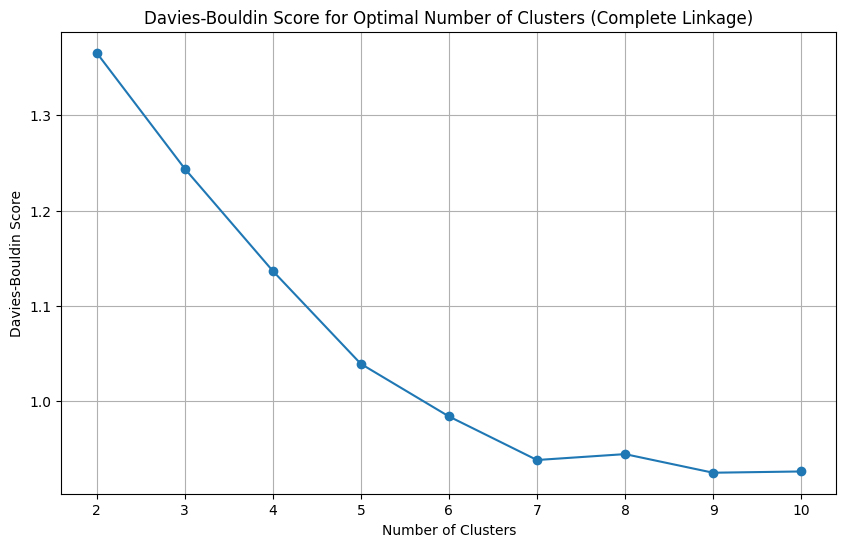

In [ ]:
from sklearn.metrics import davies_bouldin_score

# 다양한 클러스터 수에 대해 Davies-Bouldin Score 계산
davies_bouldin_scores = []
cluster_range = range(2, 11)  # 2에서 10까지의 클러스터 수를 테스트
for n_clusters in cluster_range:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    labels = model.fit_predict(X_pca)
    score = davies_bouldin_score(X_pca, labels)
    davies_bouldin_scores.append(score)
    print(f"Number of clusters: {n_clusters}, Davies-Bouldin Score: {score}")

# Davies-Bouldin Score 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score for Optimal Number of Clusters (Complete Linkage)')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


# 해석
- 해석을 위해 원본스케일링 데이터 말고 순서형,범주형 인코딩만 한 원본 데이터에 클러스터 번호 추가

In [ ]:
# 해석을 위해 원본스케일링 데이터 말고 원본 데이터에 클러스터 번호 추가
df = pd.read_csv("https://drive.google.com/uc?id=1nB9dsG-u4PqLVBhi9ShxkMI4gVsw5R9w")
CALC_order = ['no' , 'Sometimes' , 'Frequently' , 'Always']
CAEC_order = ['no' , 'Sometimes' , 'Frequently' , 'Always']
NObeyesdad_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# OrdinalEncoder 객체 생성
encoder = OrdinalEncoder(categories=[CALC_order, CAEC_order, NObeyesdad_order])

# 'CALC'와 'CAEC', ' NObeyesdad_order' 열만 선택하여 인코딩
encoded_columns = encoder.fit_transform(df[['CALC', 'CAEC', 'NObeyesdad']])

# 변환된 결과를 데이터프레임으로 변환
encoded_df = pd.DataFrame(encoded_columns, columns=['CALC', 'CAEC', 'NObeyesdad'])

# 원래 데이터프레임의 'CALC'와 'CAEC' 열을 인코딩된 값으로 대체
df[['CALC', 'CAEC', 'NObeyesdad']] = encoded_df

# 순서 없는 범주형변수들을 지정해서 원핫인코딩 수행
columns_to_dummy = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'MTRANS']
df = pd.get_dummies(df, columns=columns_to_dummy, drop_first=True, dtype=int)





from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# 클러스터링 모델 생성 및 학습
n_clusters = 8
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')  # 원하는 linkage method 선택
cluster_labels = model.fit_predict(X)

# 클러스터 번호를 원본 데이터에 추가
df_Xcluster = pd.DataFrame(df)  # 예시 데이터의 특성 데이터를 DataFrame으로 변환
df_Xcluster['Cluster'] = cluster_labels  # 클러스터 번호를 DataFrame에 추가

# 결과 확인
df_Xcluster.head()

,Age,Height,Weight,CALC,FCVC,NCP,CH2O,FAF,TUE,CAEC,...,Gender_Male,FAVC_yes,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster
0,21.0,1.62,64.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,1,0,1
1,21.0,1.52,56.0,1.0,3.0,3.0,3.0,3.0,0.0,1.0,...,0,0,1,1,1,0,0,1,0,2
2,23.0,1.80,77.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,...,1,0,0,0,1,0,0,1,0,0
3,27.0,1.80,87.0,2.0,3.0,3.0,2.0,2.0,0.0,1.0,...,1,0,0,0,0,0,0,0,1,2
4,22.0,1.78,89.8,1.0,2.0,1.0,2.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,3


클러스터 별 특징 확인하기

In [ ]:
# 클러스터별 피처들의 요약 통계량 확인
cluster_summary = df_Xcluster.groupby('Cluster').describe()
cluster_summary

Age                                                        \
         count       mean       std        min        25%        50%   
Cluster                                                                
0        508.0  22.071164  3.691424  16.000000  19.000000  21.769919   
1        325.0  21.724486  3.698341  16.000000  18.372563  21.000000   
2        245.0  20.568616  2.769152  14.000000  18.880610  20.000000   
3        273.0  24.965937  6.338780  16.380090  21.000000  22.829681   
4         55.0  20.837383  2.374061  16.000000  19.000000  21.000000   
5        565.0  25.926627  5.341535  18.000000  21.394047  25.994949   
6        107.0  36.570208  4.449783  24.244029  33.977216  37.524551   
7         33.0  45.111064  7.002615  36.631456  39.214514  43.238402   

                              Height            ...  \
               75%        max  count      mean  ...   
Cluster                                         ...   
0        24.000000  33.251015  508.0  1.734242  ...   
1        25.000000  35.000000  325.0  1.630787  ...   
2        22.038327  32.383858  245.0  1.722428  ...   
3        27.000000  47.283374  273.0  1.625130  ...   
4        22.187283  27.000000   55.0  1.720504  ...   
5        29.695603  41.000000  565.0  1.752130  ...   
6        39.737269  45.821267  107.0  1.649876  ...   
7        51.000000  61.000000   33.0  1.650530  ...   

        MTRANS_Public_Transportation      MTRANS_Walking                      \
                                 75%  max          count      mean       std   
Cluster                                                                        
0                                1.0  1.0          508.0  0.027559  0.163867   
1                                1.0  1.0          325.0  0.018462  0.134821   
2                                1.0  1.0          245.0  0.081633  0.274365   
3                                1.0  1.0          273.0  0.010989  0.104442   
4                                1.0  1.0           55.0  0.036364  0.188919   
5                                1.0  1.0          565.0  0.012389  0.110714   
6                                0.0  1.0          107.0  0.028037  0.165856   
7                                0.0  1.0           33.0  0.030303  0.174078   

                                  
         min  25%  50%  75%  max  
Cluster                           
0        0.0  0.0  0.0  0.0  1.0  
1        0.0  0.0  0.0  0.0  1.0  
2        0.0  0.0  0.0  0.0  1.0  
3        0.0  0.0  0.0  0.0  1.0  
4        0.0  0.0  0.0  0.0  1.0  
5        0.0  0.0  0.0  0.0  1.0  
6        0.0  0.0  0.0  0.0  1.0  
7        0.0  0.0  0.0  0.0  1.0  

[8 rows x 160 columns]